# Market Basket Analysis

In [90]:
import numpy as np # import the numpy library with an alias of np
import pandas as pd # import the pandas library with an alias of pd
import matplotlib.pyplot as plt # import the pyplot module from the matplotlib library with an alias of plt
import os # import the os library for operating system-related tasks

from itertools import combinations # import the combinations function from the itertools module
from wordcloud import WordCloud # import the WordCloud class from the wordcloud module

pd.options.display.max_rows = 1000 # set a display option for pandas to show up to 1000 rows

In [91]:
os.listdir("mba")
# Returns a list of all files and directories in the "mba" directory 
#located in the current working directory

['Association_customer-recommendations.docx',
 'calculation.txt',
 'confidence.png',
 'Dataset.xlsx',
 'MBA_SYNOPSIS.docx',
 'Seminnartrial.xlsx',
 'support.png']

In [92]:
data = pd.read_excel("mba/Dataset.xlsx", header=None) 
# Read an Excel file called Dataset.xlsx located in the "mba" directory into a pandas DataFrame with no header row


In [93]:
data.shape 
# Returns the dimensions of the DataFrame as a 
#tuple of (number of rows, number of columns)

(7501, 20)

In [94]:
data 
# Represents a pandas DataFrame containing the data read 
#from the "Dataset.xlsx" Excel file

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#df.iloc[7497] # Retrieves the row of the DataFrame located at index 7497 using integer-based indexing
#check the specific row data

In [96]:
all_items = []
for col in data.columns:
    all_items.extend(data[col].dropna().values)
#get the unique values in the dataFrame

In [97]:
all_items_text = " ".join([x.replace(" ", "_") for x in all_items])
word_cloud = WordCloud(width = 800, height = 800, collocations = False,
                       background_color = 'white').generate(all_items_text)
#ceate wordcloud to unique values in the all_items_text
#generate object is used to call the wordcloud, it can be shown using imshow()
#

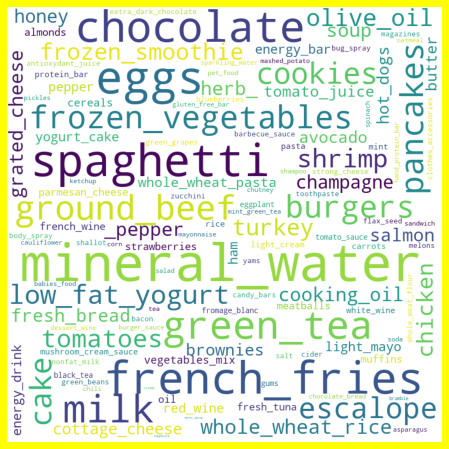

In [98]:
plt.figure(figsize = (8, 8), facecolor = "Yellow")
plt.imshow(word_cloud)#display the wordcloud fig
plt.axis("off")#to turn off the x and y axis labels and ticks
 
plt.show()


In [99]:
dfz = pd.DataFrame()  # Create an empty DataFrame object
dfz['all_items'] = all_items  # Add a new column to the DataFrame with the list of all_items as its values
dfz['all_items'].value_counts()  # Compute and display the count of each unique value in the 'all_items' column of the DataFrame

mineral water           1788
eggs                    1348
spaghetti               1306
french fries            1282
chocolate               1230
green tea                991
milk                     972
ground beef              737
frozen vegetables        715
pancakes                 713
burgers                  654
cake                     608
cookies                  603
escalope                 595
low fat yogurt           574
shrimp                   536
tomatoes                 513
olive oil                494
frozen smoothie          475
turkey                   469
chicken                  450
whole wheat rice         439
grated cheese            393
cooking oil              383
soup                     379
herb & pepper            371
honey                    356
champagne                351
fresh bread              323
salmon                   319
brownies                 253
avocado                  250
hot dogs                 243
cottage cheese           239
tomato juice  

In [100]:
len(set(all_items))  
# Compute and display the number of unique items in the all_items list

119

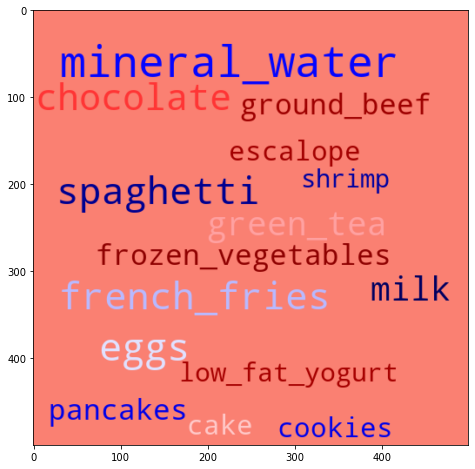

In [101]:
#change font_size, max_word and background_color
wordcloud = WordCloud(width=500, height=500, max_font_size=50, max_words=15, background_color="salmon",
                      colormap='seismic',random_state=1).generate(all_items_text)  # Generate a word cloud using the WordCloud library

plt.figure(figsize = (8, 8))  # Create a new figure with a size of 8x8 inches

#Display the image
plt.imshow(wordcloud, interpolation="bilinear")
#plt.figure(figsize = (1, 1), facecolor = None)
#plt.figure(figsize=(400, 300))
#plt.figure()
#plt.margins(x=45, y=10)
#plt.axis("off")
plt.show()


## Data Preprocessing

In [102]:
orignial_count = [data.iloc[x, :].dropna().shape[0] for x in range(data.shape[0])]
unique_count = [data.iloc[x, :].dropna().unique().shape[0] for x in range(data.shape[0])]
#iterate over dataframe by dropping nan values  
#1-This will give the number of items that were present in the original row (including duplicates).
#2-This will give the number of unique items that were present in the row (excluding duplicates).

In [103]:
# Create Pandas Series objects from original_count and unique_count
original_count1 = pd.Series(orignial_count)
unique_count1 = pd.Series(unique_count)

In [104]:
# Compare the values in the original_count1 and unique_count1 Series objects 
# and store the differences in a new DataFrame called 'duplicates'
duplicates = original_count1.compare(unique_count1)

# Rename the columns of the 'duplicates' DataFrame to 'Original' and 'Processed' 
# to make it easier to interpret the results
duplicates.columns = ['Original', 'Processed']

# Print the 'duplicates' DataFrame to view the results
print(duplicates)


      Original  Processed
4394       8.0        7.0
4494       6.0        5.0
4526       6.0        5.0
6903       8.0        7.0
7109       8.0        7.0


##### We can see that transaction number 4394, 4494, 4526, 6903 and 7109 are having duplicate items in the transaction, lets print on of these transactions to verify the same

In [105]:
# Select row 4394 from the data DataFrame and remove any missing values
cleaned_row = data.iloc[4394, :].dropna()

##### There are duplicate items in the transactions, lets remove these in order to avoid further problems and create frequent itemsets

##### ham is repeating twice

#### Let us remove these duplicate items from the transactions.

In [106]:
# Loop through the index values of the "duplicates" object
for val in duplicates.index.values:
    
    # Select the row with the current index value and replace it with a new Pandas Series
    # containing only the unique values from the original row
    unique_row = pd.Series(data.iloc[val, :].unique())
    
    # Reindex the new Pandas Series to ensure it has the same number of rows as the original row
    # (in this case, 20 rows)
    reindexed_row = unique_row.reindex(range(20))
    
    # Replace the original row in the DataFrame with the new reindexed row
    data.iloc[val, :] = reindexed_row


In [107]:
data.iloc[4394, :].dropna()

0             burgers
1                 ham
2                eggs
3    whole wheat rice
4        french fries
5             cookies
6           green tea
Name: 4394, dtype: object

#### Now we have successfully eliminated the duplicates
#<b>Note:</b> I think its also a good idea to remove the transactions having just 1 item, but our dataset is smaller so its okay to leave them as is for now.

#### Generating One-hot encoding dataset from the items data

- Get unique items
- Create a dictionary with item and the index number
- Above details will help us to generate one-hot-encoding 

In [108]:
# Convert the list of all items to a set to remove duplicates
all_items = set(all_items)

In [109]:
# Create a dictionary that maps each item in all_items to its index
item_dict = dict(zip(all_items, range(len(all_items))))

In [110]:
# Create an empty list to store the one-hot encoded data
one_hot_en = []

# Loop over each row in the DataFrame
for i, r in data.iterrows():
    # Create a list of zeros with the same length as the list of unique items
    row = [0]*len(all_items)
    
    # Loop over each item in the row
    for x in r:
        # If the item is not null, set the corresponding value in the one-hot encoded row to 1
        if x is not np.nan:
            row[item_dict[x]] = 1
    
    # Add the one-hot encoded row to the list
    one_hot_en.append(row)


In [111]:
# Create a Pandas DataFrame from the one-hot encoded array, with columns named after all_items
df = pd.DataFrame(one_hot_en, columns=all_items)

In [112]:
# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,escalope,green grapes,bacon,almonds,corn,clothes accessories,magazines,pasta,protein bar,pickles,...,nonfat milk,babies food,melons,vegetables mix,turkey,soup,cereals,mint green tea,energy bar,candy bars
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


##### Initial assumptions for the support and confidence threshold, will observe the results and update these parameters accordingly, if required(changing)

In [113]:
# Get the number of rows in the DataFrame
N = df.shape[0]

# Set the minimum support to 2 (1% of the total number of rows)
min_support = 2  ### 1%

# Set the minimum confidence to 60% 
min_confidence = 35  ### 35%

###### Formula for calculating support

![support](support.png)

###### Formula for calculating confidence

![confidence](confidence.png)

### Generate frequent 1-itemsets. 

In [114]:
# Count the number of occurrences of each item in the DataFrame
c1 = df.sum()

# Calculate the percentage of transactions that contain each item
l1 = (c1 / N) * 100

# Filter out items that have less than the minimum support threshold
l1 = l1[l1 >= min_support]

In [115]:
# Get the dimensions of the Pandas Series object "l1"
l1.shape
#output is a tuple (53,) represents dimensions of the Pandas Series object

(53,)

#### So number of frequent 1-itemsets are 75

##### Based on our transactional data, we found that 75 items are being purchased frequently, which qualify our support threshold

### Generate 2-itemsets

In [116]:
# Generate a list of all possible pairs of items from the frequent itemset
k2_items = list(combinations(list(l1.index), 2))

In [117]:
# Count the number of pairs of items generated in the previous step-returns a tuple obj
len(k2_items)

1378

In [118]:
# Count the number of occurrences of each pair of items in the dataset
counts = []
for item in k2_items:
    counts.append((df[item[0]]*df[item[1]]).sum())

In [119]:
# Create a DataFrame to store the counts and support values for each pair of items
c2 = pd.DataFrame()
c2['itemset'] = k2_items
c2['counts'] = counts
c2['support'] = (c2.counts/N) * 100


##### Let us now calculate the confidence, below is the approach I am using to calculate the confidence

- Consider we have items set {I1, I2}
- Calculate confidence as c1 = {I1, I2} / I1
- Calculate confidence as c2 = {I2, I1} / I2
- Get the maximum of (c1, c2), and that's our confidence score

This is just a manual approach, further will use some library to calculate all these stuff and compare the results

In [120]:
# Calculate the confidence and maximum confidence values for each pair of items
c2['confidence (x -> y)'] = [((r['counts'] / c1[r['itemset'][0]]) * 100) for i, r in c2.iterrows()]
c2['confidence (y -> x)'] = [((r['counts'] / c1[r['itemset'][1]]) * 100) for i, r in c2.iterrows()]
c2['max_confidence'] = c2[['confidence (x -> y)', 'confidence (y -> x)']].max(axis=1)

In [121]:
a2=c2[(c2['support'] >= min_support) & (c2['max_confidence'] >= min_confidence)]
a2
#This block of code is selecting only those rows from the DataFrame "c2" that 
#meet the minimum support and minimum confidence thresholds, 
#and storing the result in a new DataFrame called "a2".

,itemset,counts,support,confidence (x -> y),confidence (y -> x),max_confidence
519,"(spaghetti, ground beef)",294,3.919477,22.511485,39.891452,39.891452
665,"(ground beef, mineral water)",307,4.092788,41.655360,17.170022,41.655360
702,"(tomatoes, mineral water)",183,2.439675,35.672515,10.234899,35.672515
807,"(milk, mineral water)",360,4.799360,37.037037,20.134228,37.037037
903,"(frozen vegetables, mineral water)",268,3.572857,37.482517,14.988814,37.482517
1017,"(chicken, mineral water)",171,2.279696,38.000000,9.563758,38.000000
1263,"(cooking oil, mineral water)",151,2.013065,39.425587,8.445190,39.425587
1290,"(olive oil, mineral water)",207,2.759632,41.902834,11.577181,41.902834
1323,"(pancakes, mineral water)",253,3.372884,35.483871,14.149888,35.483871
1339,"(mineral water, soup)",173,2.306359,9.675615,45.646438,45.646438


In [122]:
## Print the dimensions of the DataFrame "a2"
a2.shape

(10, 6)

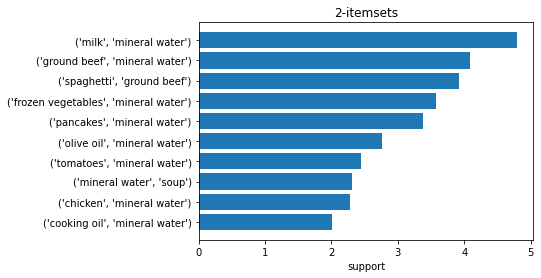

In [123]:
plt_data = a2[a2['support'] >= 1].sort_values('support')#The first line selects only the rows from DataFrame "a2" where the support value is greater than or equal to 1, and stores the result in a new DataFrame called "plt_data".
plt_data['itemset'] = plt_data['itemset'].apply(str)#The second line converts the "itemset" column of "plt_data" from a tuple to a string so that it can be used as the x-axis labels of the bar chart.
plt.barh(plt_data.itemset, plt_data.support)#The third line creates the horizontal bar chart using the "barh" method from Matplotlib's pyplot library. The x-axis values are taken from the "support" column of "plt_data", while the y-axis values are taken from the "itemset" column.
plt.title("2-itemsets")#The fourth and fifth lines add a title and an x-axis label to the plot, respectively. The y-axis label is commented out since it is not necessary to include it in this case.
plt.xlabel('support')
#plt.ylabel('itemset')
plt.show()#The last line displays the plot.

#### we found 14 strong frequent 2-itemsets

Rules that satisfy both minimum-support threshold and minimun-confidence threshold are call <b>Strong</b>

In [124]:
l2 = c2[c2['support'] >= min_support]
l2_unique_items = list((set([x[0] for x in l2['itemset']] + [x[1] for x in l2['itemset']])))
#This code selects all frequent 2-itemsets whose support is greater than or equal to the minimum support threshold, and stores the result in a new DataFrame called "l2".

In [125]:
l2.shape
#This code will return the dimensions of DataFrame "l2", which contains all frequent 2-itemsets whose support is greater than or equal to the minimum support threshold.

(50, 6)

In [126]:
len(l2)
#This code will return the number of frequent 2-itemsets found in the dataset, given the minimum support and confidence thresholds.

50

###### Number of frequent 2-itemsets are 165
### Now generate 3-itemsets

In [127]:
k3_items = list(combinations(list(l2_unique_items), 3))
print(len(k3_items))

1330


In [128]:
counts3 = []
for item in k3_items:
    counts3.append((df[item[0]]*df[item[1]]*df[item[2]]).sum())

In [129]:
c3 = pd.DataFrame()
c3['itemset'] = k3_items
c3['counts'] = counts3
c3['support'] = (c3.counts/N) * 100

In [130]:
def find_itemset(itemset):
    for i, r in l2.iterrows():
        if len(set(itemset) - set(r['itemset'])) == 0:
            return r['counts']
        else:
            return 0
        break
len(counts)

1378

##### Same approach is being used for confidence calculation for 3-itemset

In [131]:
xyz_conf = []
yzx_conf = []
zxy_conf = []
for i, r in c3.iterrows():
    if find_itemset(r['itemset'][0:2]) == 0:
        xyz_conf.append(0)
    else:
        xyz_conf.append((r['counts']/find_itemset(r['itemset'][0:2]))*100)
    
    if find_itemset(r['itemset'][1:]) == 0:
        yzx_conf.append(0)
    else:
        yzx_conf.append((r['counts']/find_itemset(r['itemset'][1:]))*100)
        
    if find_itemset(r['itemset'][::2]) == 0:
        zxy_conf.append(0)
    else:
        zxy_conf.append((r['counts']/find_itemset(r['itemset'][::2]))*100)

In [132]:
c3['confidence xy->z'] = xyz_conf
c3['confidence yz->x'] = yzx_conf
c3['confidence zx->y'] = zxy_conf

In [133]:
c3['max_confidence'] = c3[['confidence xy->z','confidence yz->x','confidence zx->y']].max(axis=1)

In [134]:
c3[c3['support'] >= 1].shape

(17, 7)

In [135]:
#c3[c3['support'] >= 1]
#c3[c3['max_confidence']>0]

In [136]:
#c3[c3['max_confidence']>0]
#c3.head()

###### Number of frequent 3-itemsets are 17

In [137]:
#x=c3[c3['support'] >= 1]
#c3

Text(0.5, 0, 'support')

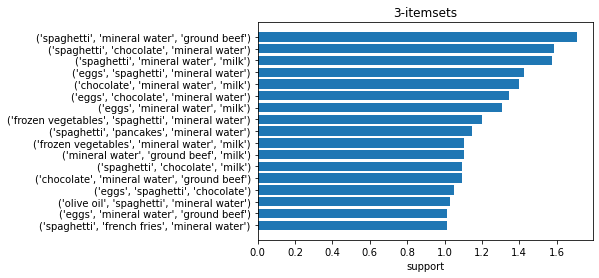

In [138]:
plt_data = c3[c3['support'] >= 1].sort_values('support')
plt_data['itemset'] = plt_data['itemset'].apply(str)
plt.barh(plt_data.itemset, plt_data.support)
plt.title("3-itemsets")
plt.xlabel('support')
#plt.ylabel('itemset')

##### Now we have calculated frequent itemsets by manually, now we will try MLXtend library  and compare both the results
### Let us use MLXtend library to generate and evaluate rules

In [139]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules

In [140]:
# filling null values with string "ZERO"
dataset = data.fillna("ZERO")

In [141]:
# using TransactionEncoder to encode items data to True/False
encoding = TransactionEncoder()
encoding.fit(dataset.values)
encoded_data = encoding.transform(dataset.values)

In [142]:
# converting transformed values to pandas DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoding.columns_)

In [143]:
# removing the ZERO column
encoded_df.drop('ZERO', axis=1, inplace=True)

In [144]:
frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True, max_len=4)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [145]:
frequent_itemsets.groupby("length").count()

,support,itemsets
length,,
1,75,75
2,165,165
3,17,17


##### Above table describes the frequent itemsets 1, 2, 3

### Now we will use FP Growth algorithm with same parameters and compare the results

In [146]:
frequent_itemsets = fpgrowth(encoded_df, min_support=0.01, use_colnames=True, max_len=4)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [147]:
frequent_itemsets.groupby("length").count()

,support,itemsets
length,,
1,75,75
2,165,165
3,17,17


###### FP Growth algorithm gives same results as Apriori. But main advantage of FP growth is, its faster and memory efficient

In [148]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [149]:
rules.shape

(406, 9)

In [150]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405
1,(spaghetti),(green tea),0.174110,0.132116,0.026530,0.152374,1.153335,0.003527,1.023900
2,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436
3,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786
4,(chocolate),(green tea),0.163845,0.132116,0.023464,0.143206,1.083943,0.001817,1.012944


In [151]:
len(rules)

406

######  we have 406 rules in total itemsets whicch qualify lift

###### We need to filter-out the relevent rules based on our min_support and min_confidence

In [152]:
rules[ (rules['confidence'] > 0.35) &
       (rules['support'] > 0.01) ].reset_index()
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405
1,(spaghetti),(green tea),0.174110,0.132116,0.026530,0.152374,1.153335,0.003527,1.023900
2,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436
3,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786
4,(chocolate),(green tea),0.163845,0.132116,0.023464,0.143206,1.083943,0.001817,1.012944
5,(green tea),(chocolate),0.132116,0.163845,0.023464,0.177598,1.083943,0.001817,1.016724
6,(green tea),(eggs),0.132116,0.179709,0.025463,0.192735,1.072479,0.001721,1.016135
7,(eggs),(green tea),0.179709,0.132116,0.025463,0.141691,1.072479,0.001721,1.011156
8,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585
9,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,0.005756,1.026851


In [153]:
len(rules)

406

###### Now lets calculate Support and Confidence for different values to see the variations in the results 
Minimum Support = 1%

In [154]:
frequent_itemsets3 = fpgrowth(encoded_df, min_support=0.01, use_colnames=True, max_len=4)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3.groupby("length").count()

,support,itemsets
length,,
1,75,75
2,165,165
3,17,17


In [155]:
#We got very less itemsets, lets try by reducing the support value

###### Minimum Support = 2%

In [156]:
frequent_itemsets2 = fpgrowth(encoded_df, min_support=0.02, use_colnames=True, max_len=4)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2.groupby("length").count()

,support,itemsets
length,,
1,53,53
2,50,50


###### There are no 3-itemsets with Minimum support value = 2%

###### Generating association rules with updated support and confidence
min_spport = 3% and min_confidence = 40%

In [157]:
rules1 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)
print("Number of rules: ", rules1.shape)
rules1[ (rules1['confidence'] > 0.4) &
       (rules1['support'] > 0.03) ].reset_index()

Number of rules:  (406, 9)


,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,334,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401


###### There is only one rule that satifies our support and confidence threshold, when s=3% and c=40%

### Ground beef --> Mineral water

In [158]:
#len(rules1)
rules1
#3.07/7501 * 100 = 0.040927

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405
1,(spaghetti),(green tea),0.174110,0.132116,0.026530,0.152374,1.153335,0.003527,1.023900
2,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436
3,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786
4,(chocolate),(green tea),0.163845,0.132116,0.023464,0.143206,1.083943,0.001817,1.012944
5,(green tea),(chocolate),0.132116,0.163845,0.023464,0.177598,1.083943,0.001817,1.016724
6,(green tea),(eggs),0.132116,0.179709,0.025463,0.192735,1.072479,0.001721,1.016135
7,(eggs),(green tea),0.179709,0.132116,0.025463,0.141691,1.072479,0.001721,1.011156
8,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585
9,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,0.005756,1.026851


#### Let us try to generate rules by using reduced support threshold


In [159]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
print("Number of rules: ", rules2.shape)


Number of rules:  (94, 9)


In [160]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405
1,(spaghetti),(green tea),0.174110,0.132116,0.026530,0.152374,1.153335,0.003527,1.023900
2,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436
3,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786
4,(chocolate),(green tea),0.163845,0.132116,0.023464,0.143206,1.083943,0.001817,1.012944
5,(green tea),(chocolate),0.132116,0.163845,0.023464,0.177598,1.083943,0.001817,1.016724
6,(green tea),(eggs),0.132116,0.179709,0.025463,0.192735,1.072479,0.001721,1.016135
7,(eggs),(green tea),0.179709,0.132116,0.025463,0.141691,1.072479,0.001721,1.011156
8,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585
9,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,0.005756,1.026851


###### min_spport = 2%    and   min_confidence = 40%

In [161]:
rules2[ (rules2['confidence'] > 0.40) & (rules2['support'] > 0.02) ].reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,15,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
1,45,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
2,84,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
